In [1]:
import os
import io
import sys

import argparse
import numpy as np
import pickle

In [2]:
from MulticoreTSNE import MulticoreTSNE as TSNE
import matplotlib.pyplot as plt

with open("../pointnet/global_shape_3503.pkl", "rb") as f:
    shape_info = pickle.load(f)
# shape_info = np.load("../pointnet/global_shape_3503.npy", allow_pickle=True)
# np.load(io.BytesIO(open('../pointnet/global_shape_3503.npy', 'rb').read()), allow_pickle=True)
print(shape_info.keys())
all_shapes_pnt = shape_info['shapes']
objects_pnt = shape_info['objects']
labels_pnt = shape_info['labels']



dict_keys(['shapes', 'labels', 'objects'])


In [3]:
tsne_pointnet = TSNE(n_jobs=8)
embeddings = tsne_pointnet.fit_transform(all_shapes_pnt)
vis_x_pnt = embeddings[:, 0]
vis_y_pnt = embeddings[:, 1]
# plt.scatter(vis_x, vis_y, c=objects, cmap=plt.cm.get_cmap("jet", 10), marker='.')
# plt.colorbar(ticks=range(10))
# plt.clim(-0.5, 9.5)
# plt.show()

In [ ]:
# plt.scatter(vis_x, vis_y, c=objects, cmap=plt.cm.get_cmap("jet", 40), marker='.')
# plt.colorbar(ticks=range(40))
plt.scatter(vis_x_pnt, vis_y_pnt, c=objects, cmap=plt.cm.get_cmap("jet"), marker='.')
plt.clim(-0.5, 9.5)
plt.xlim([-60,60])
plt.ylim([-60,60])
plt.show()

In [4]:
with open("../stack_global_shape_3503.pkl", "rb") as f:
    shape_info = pickle.load(f)
# shape_info = np.load("../pointnet/global_shape_3503.npy", allow_pickle=True)
# np.load(io.BytesIO(open('../pointnet/global_shape_3503.npy', 'rb').read()), allow_pickle=True)
print(shape_info.keys())
all_shapes_adv = shape_info['shapes']
objects_adv = shape_info['objects']
labels_adv = shape_info['labels']

dict_keys(['shapes', 'labels', 'objects'])


In [5]:
tsne_adv = TSNE(n_jobs=8)
embeddings = tsne_adv.fit_transform(all_shapes_adv)
vis_x_adv = embeddings[:, 0]
vis_y_adv = embeddings[:, 1]

In [6]:
with open("../stack_reg_global_shape_3503.pkl", "rb") as f:
    shape_info = pickle.load(f)
# shape_info = np.load("../pointnet/global_shape_3503.npy", allow_pickle=True)
# np.load(io.BytesIO(open('../pointnet/global_shape_3503.npy', 'rb').read()), allow_pickle=True)
print(shape_info.keys())
all_shapes_reg = shape_info['shapes']
objects_reg = shape_info['objects']
labels_reg = shape_info['labels']

dict_keys(['shapes', 'labels', 'objects'])


In [7]:
tsne_reg = TSNE(n_jobs=8)
embeddings = tsne_adv.fit_transform(all_shapes_reg)
vis_x_reg = embeddings[:, 0]
vis_y_reg = embeddings[:, 1]

In [ ]:
# plt.scatter(vis_x, vis_y, c=objects, cmap=plt.cm.get_cmap("jet", 40), marker='.')
# plt.colorbar(ticks=range(40))
plt.scatter(vis_x_adv, vis_y_adv, c=objects, cmap=plt.cm.get_cmap("jet"), marker='.')
plt.xlim([-60,60])
plt.ylim([-60,60])
plt.clim(-0.5, 9.5)
plt.show()

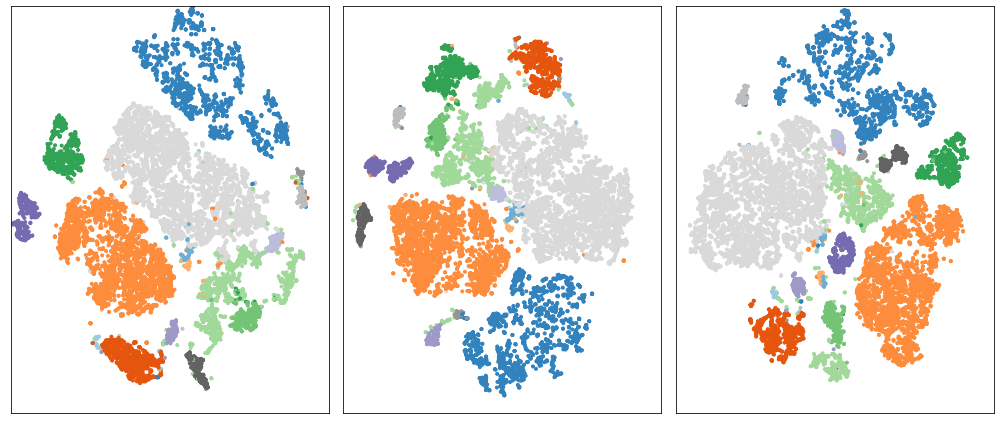

In [12]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(131)
ax.scatter(vis_x_pnt, vis_y_pnt, c=objects_pnt, cmap=plt.cm.get_cmap("tab20c"), marker='.')
# plt.clim(-0.5, 9.5)
ax.set_xlim([-60,60])
ax.set_ylim([-60,60])
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(132)
ax.scatter(vis_x_adv, vis_y_adv, c=objects_adv, cmap=plt.cm.get_cmap("tab20c"), marker='.')
# plt.clim(-0.5, 9.5)
ax.set_xlim([-60,60])
ax.set_ylim([-60,60])
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(133)
ax.scatter(vis_x_reg, vis_y_reg, c=objects_reg, cmap=plt.cm.get_cmap("tab20c"), marker='.')
# plt.clim(-0.5, 9.5)
ax.set_xlim([-60,60])
ax.set_ylim([-60,60])
ax.set_xticks([])
ax.set_yticks([])

fig.tight_layout()
plt.show()

In [ ]:
objects = np.array(objects)
labels = np.array(labels)
print(labels.shape, objects[0])
idx = np.where(objects==0)[0]
# print(idx.shape)

colors = plt.cm.jet(np.linspace(0, 1, 2))

# airplanes = embeddings[idx,:]
# airplanes_labels = labels[idx]
# print(np.where(airplanes_labels==1)[0].shape, np.where(airplanes_labels==0)[0].shape)
# print(embeddings.shape, airplanes.shape)

# label = np.where(airplanes_labels==1)[0]
# unlabel = np.where(airplanes_labels==0)[0]



label = np.where((objects == 0) & (labels == 1))[0]
unlabel = np.where((objects == 0) & (labels == 0))[0]

print(label.shape, unlabel.shape)

vis_x = embeddings[label, 0]
vis_y = embeddings[label, 1]

print(vis_x.shape, vis_y.shape)
plt.scatter(vis_x, vis_y, c='b', marker='.')

vis_x = embeddings[unlabel, 0]
vis_y = embeddings[unlabel, 1]

print(vis_x.shape, vis_y.shape)
plt.scatter(vis_x, vis_y, c='r', marker='.')

# plt.colorbar(ticks=range(2))
plt.clim(-0.5, 9.5)
plt.show()